In [9]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [47]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
label = pd.read_csv('train.csv',header=None)
label.columns = ['id', 'label']
bboxes = pd.read_csv('train_bboxes.csv')

In [14]:
label['label'][label['label']==0].count()

15504

In [4]:
def read_img(img_id, data_dir, train_or_test, size):

    img = image.load_img(os.path.join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [5]:
label.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [6]:
bboxes.head(10)

,filename,x,y,width,height
0,6,287.0,673.0,188.0,220.0
1,8,651.0,476.0,250.0,344.0
2,18,220.0,414.0,142.0,120.0
3,24,327.0,138.0,108.0,157.0
4,27,273.0,550.0,139.0,146.0
5,28,761.0,512.0,146.0,153.0
6,29,326.0,287.0,191.0,292.0
7,30,645.0,296.0,208.0,545.0
8,30,286.0,197.0,159.0,447.0
9,36,267.0,328.0,310.0,309.0


(286, 197, 159, 447)

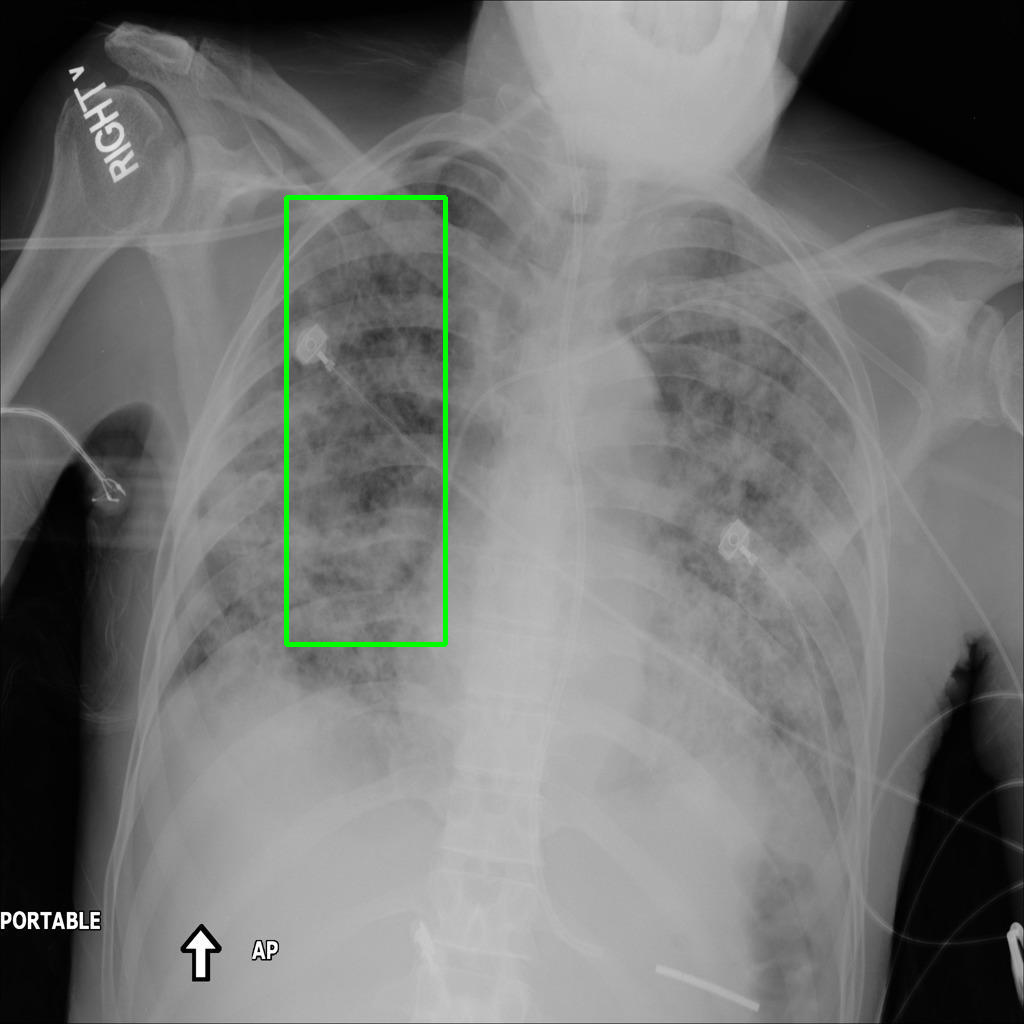

In [9]:
file,x,y,w,h = (int(bboxes.iloc[8,x]) for x in range(5))
img = cv2.imread('./train/{}.jpg'.format(file))
img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
img = Image.fromarray(img)
(x,y,w,h)
img

### 将3,4个病灶的归为2个

In [23]:
label['label'][label['label']==3] = 2
label['label'][label['label']==4] = 2

### 切分数据为五份,每一份二八份为验证集和训练集

In [19]:
label.sort_values(by='label',ascending=True,inplace=True)

In [34]:
res_label = label[label['label']!=0]
normal_label = label[label['label']==0]

In [39]:
normal1,normal2,normal3,normal4,normal5 = normal_label.iloc[0:3100],normal_label.iloc[3100:6200],normal_label.iloc[6200:9300],normal_label.iloc[9300:12400],normal_label.iloc[12400:]

In [44]:
label1 = pd.concat([normal1,res_label],axis=0)
label2 = pd.concat([normal2,res_label],axis=0)
label3 = pd.concat([normal3,res_label],axis=0)
label4 = pd.concat([normal4,res_label],axis=0)
label5 = pd.concat([normal5,res_label],axis=0)

In [66]:
label_book = [label1,label2,label3,label4,label5]

In [72]:
for i,label in enumerate(label_book):
    train_X,test_X, train_y, test_y = train_test_split(label['id'].values,
                                                       label['label'].values,
                                                       test_size = 0.2,
                                                       random_state = 0)
    df_train = pd.DataFrame({'id':train_X,'label':train_y})
    df_test = pd.DataFrame({'id':test_X,'label':test_y})
    df_train.to_csv('./data/train_{}.csv'.format(i+1),index=0)
    df_test.to_csv('./data/test_{}.csv'.format(i+1),index=0)